In [53]:
import numpy as np
import os
import math
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import MIP results

In [54]:
# path = "../sequential_metaheuristic/results/LIR_sorted_filtered/nodes/*.csv"
path = "../../HPC_results/seq_mip/nodes/*.csv"
files = glob.glob(path)

print(files)

['../../HPC_results/seq_mip/nodes\\final_solution_T10_N10_R500_U5.csv', '../../HPC_results/seq_mip/nodes\\final_solution_T12_N15_R500_U5.csv', '../../HPC_results/seq_mip/nodes\\final_solution_T15_N20_R500_U5.csv', '../../HPC_results/seq_mip/nodes\\final_solution_T17_N25_R500_U5.csv', '../../HPC_results/seq_mip/nodes\\final_solution_T20_N30_R500_U5.csv', '../../HPC_results/seq_mip/nodes\\final_solution_T22_N35_R500_U5.csv', '../../HPC_results/seq_mip/nodes\\final_solution_T25_N40_R500_U5.csv', '../../HPC_results/seq_mip/nodes\\final_solution_T27_N45_R500_U5.csv', '../../HPC_results/seq_mip/nodes\\final_solution_T30_N50_R500_U5.csv']


In [55]:
results_MIP = pd.DataFrame(columns=["number_of_nodes", "elapsed time", "best score", "config", "seed"])

for file in files:
    results_per_file = pd.DataFrame(columns=["number_of_nodes", "elapsed time", "best score", "config", "seed"])
    # best score = file content
    imported_df = pd.read_csv(file)

    results_per_file['elapsed time'] = imported_df['elapsed time']
    results_per_file['best score'] = imported_df['score']
    results_per_file['config'] = imported_df['config']
    results_per_file['seed'] = imported_df['seed']

    # extract N from filename using .split()
    split1 = file.replace("\\", "_")
    split2 = split1.replace(".", "_")
    split3 = split2.split("_")

    for seq in split3:
        if "N" in seq:
            _, manhattan_diameter = seq.split("N")

    results_per_file['number_of_nodes'] = int(manhattan_diameter)*int(manhattan_diameter)

    # add to dataframe
    results_MIP = pd.concat(
        [results_MIP, pd.DataFrame.from_dict(results_per_file, orient="columns")]
    )

results_MIP['elapsed time (min)'] = results_MIP['elapsed time']/60

C:\Users\isvandroffelaa\AppData\Local\Temp\ipykernel_24268\3225474665.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_MIP = pd.concat(


In [56]:
results_MIP

,number_of_nodes,elapsed time,best score,config,seed,elapsed time (min)
0,100,3.186904,0.740,0,0,0.053115
1,100,3.142630,0.740,0,1,0.052377
2,100,3.159177,0.740,0,2,0.052653
3,100,3.150398,0.740,0,3,0.052507
4,100,3.182437,0.740,0,4,0.053041
...,...,...,...,...,...,...
45,2500,40.805070,0.432,9,0,0.680084
46,2500,41.171879,0.432,9,1,0.686198
47,2500,41.076626,0.432,9,2,0.684610
48,2500,41.838701,0.432,9,3,0.697312


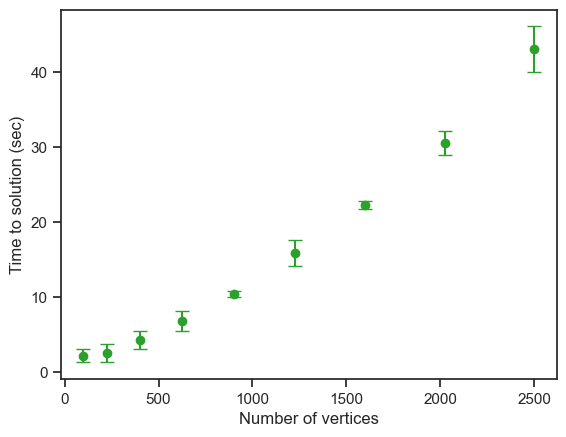

In [57]:
errorplot_x_mip = list(results_MIP['number_of_nodes'].unique())
errorplot_y_mip = []
errorplot_yerr_mip = []
for num_nodes in results_MIP['number_of_nodes'].unique():
    results_subset = results_MIP.query(f"number_of_nodes == {num_nodes}")
    errorplot_y_mip.append(np.mean(results_subset['elapsed time']))
    errorplot_yerr_mip.append(np.std(results_subset['elapsed time']))

plt.errorbar(x=errorplot_x_mip, y=errorplot_y_mip, yerr=errorplot_yerr_mip, fmt='o', capsize=5, c='tab:green')
plt.xlabel('Number of vertices', fontdict={'size':12})
plt.ylabel('Time to solution (sec)', fontdict={'size':12})

# plt.savefig('figs/cbc_scaling_units.png', bbox_inches='tight', dpi=300)
plt.show()

C:\Users\isvandroffelaa\Documents\model\simopt\analysis\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\isvandroffelaa\Documents\model\simopt\analysis\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\isvandroffelaa\Documents\model\simopt\analysis\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


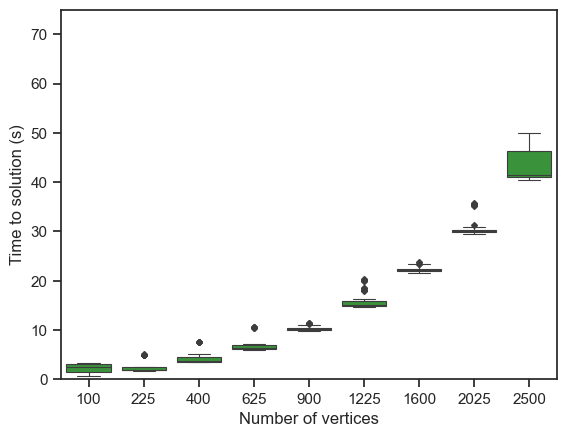

In [58]:
ax = sns.boxplot(data=results_MIP, x='number_of_nodes', y='elapsed time', 
                 color='tab:green', linewidth=0.8, flierprops={"marker": "D", "markersize": 3})
ax.set_ylim([0, 75])
ax.set(xlabel='Number of vertices', ylabel='Time to solution (s)')
plt.savefig('figs/boxplot_mip_nodes.png', dpi=300)
plt.show()

In [59]:
from collections import defaultdict

score_MIP_df = results_MIP[results_MIP["seed"] == 0][['number_of_nodes', 'config', 'best score']]
# score_MIP = results_MIP[['number of nodes', 'config', 'best score']]
# score_MIP.rename(columns={"best score": "score"})
# score_MIP.reset_index(drop=True, inplace=True)

score_MIP = defaultdict(dict)
for index, row in score_MIP_df.iterrows():
    score_MIP[row['number_of_nodes']][row['config']] = row['best score']

score_MIP

defaultdict(dict,
            {100: {0: 0.74,
              1: 0.92,
              2: 0.87,
              3: 0.854,
              4: 0.972,
              5: 1.0,
              6: 0.924,
              7: 0.74,
              8: 0.936,
              9: 1.0},
             225: {0: 0.63,
              1: 0.88,
              2: 0.61,
              3: 0.374,
              4: 0.586,
              5: 0.352,
              6: 0.362,
              7: 0.448,
              8: 0.486,
              9: 0.362},
             400: {0: 0.35,
              1: 0.202,
              2: 0.628,
              3: 0.62,
              4: 0.68,
              5: 0.41,
              6: 0.672,
              7: 0.352,
              8: 0.392,
              9: 0.574},
             625: {0: 0.388,
              1: 0.768,
              2: 0.39,
              3: 0.624,
              4: 0.51,
              5: 0.55,
              6: 0.52,
              7: 0.246,
              8: 0.244,
              9: 0.366},
             900:

## Import HPC seq-borg results

In [60]:
results_seqBORG = pd.read_csv('cleaned_data/seq_borg_MH/df_seq_borg_nodes_cleaned.csv')

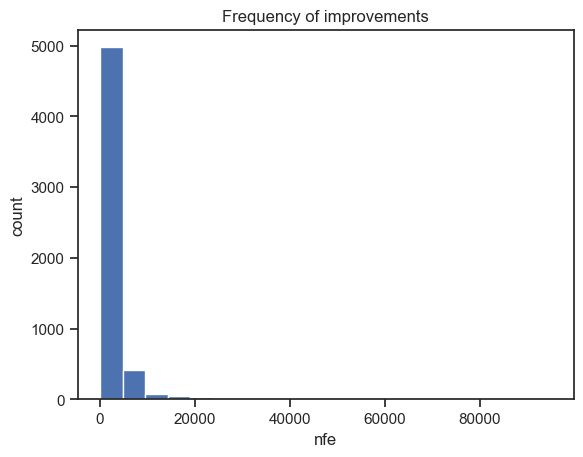

In [61]:
plt.hist(results_seqBORG['nfe'], bins=20)
plt.title('Frequency of improvements')
plt.xlabel('nfe')
plt.ylabel('count')
plt.show()

In [62]:
results_seqBORG['elapsed time (min)'] = results_seqBORG['elapsed_time']/60

In [63]:
results_seqBORG[results_seqBORG['number_of_nodes'] == 900]

,Unnamed: 0,nfe,best_score,elapsed_time,pi_0,pi_1,pi_2,pi_3,pi_4,probability_SBX,...,probability_UNDX,probability_SPX,probability_UM,number_of_units,number_of_nodes,config,seed,scaled score,improvement,elapsed time (min)
2507,2,391,0.330,0.685988,91.0,46.0,61.0,45.0,17.0,0.192308,...,0.086538,0.144231,0.105769,5,900,0,0,0.800971,0.044,0.011433
2508,6,981,0.334,1.364102,87.0,49.0,61.0,45.0,23.0,0.269231,...,0.038462,0.230769,0.086538,5,900,0,0,0.810680,0.004,0.022735
2509,7,1124,0.354,1.518112,68.0,47.0,49.0,47.0,8.0,0.317308,...,0.038462,0.163462,0.144231,5,900,0,0,0.859223,0.020,0.025302
2510,10,1559,0.358,1.874591,68.0,47.0,25.0,47.0,8.0,0.462264,...,0.009434,0.150943,0.132075,5,900,0,0,0.868932,0.004,0.031243
2511,16,2444,0.360,2.671899,68.0,52.0,25.0,47.0,8.0,0.726415,...,0.009434,0.066038,0.075472,5,900,0,0,0.873786,0.002,0.044532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,24,3661,0.224,3.416702,40.0,48.0,4.0,0.0,42.0,0.877358,...,0.009434,0.009434,0.084906,5,900,9,4,0.973913,0.004,0.056945
3171,27,4099,0.226,3.759398,40.0,44.0,4.0,0.0,42.0,0.877358,...,0.009434,0.009434,0.084906,5,900,9,4,0.982609,0.002,0.062657
3172,28,4246,0.228,3.896668,40.0,48.0,4.0,0.0,31.0,0.896226,...,0.009434,0.009434,0.066038,5,900,9,4,0.991304,0.002,0.064944
3173,37,5584,0.230,4.933008,40.0,44.0,4.0,0.0,43.0,0.896226,...,0.009434,0.009434,0.047170,5,900,9,4,1.000000,0.002,0.082217


In [64]:
max(results_seqBORG['scaled score'])

1.0

## Plot convergence

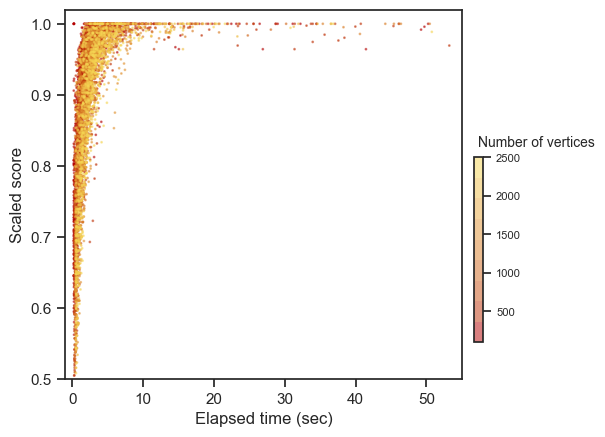

In [65]:
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap, to_rgb

cmap_name = 'my_list'
my_rgb = []
# colors = ['#b40000', '#c03607', '#cb5311', '#d56d1c', '#df8528', '#e89c33', '#f0b43e', '#f8cb4a', '#ffe356']
colors = ['#b40000', '#c03808', '#cb5614', '#d57120', '#de8a2d', '#e7a339', '#eebc46', '#f5d553', '#fbed61']
colors = ['#b40000', '#c03808', '#cb5614', '#d57120', '#de8a2d', '#e7a339', '#eebc46', '#f5d553']
for color in colors:
    my_rgb.append(to_rgb(color))
my_cmap = LinearSegmentedColormap.from_list(cmap_name, my_rgb, N=9)

fig, ax = plt.subplots()
scatter = ax.scatter(results_seqBORG['elapsed_time'], results_seqBORG['scaled score'], c=results_seqBORG['number_of_nodes'], s=1, cmap=my_cmap, alpha=0.5)
# scatter = ax.scatter(results_seqBORG['nfe'], results_seqBORG['scaled score'], c=results_seqBORG['number_of_units'], s=1, cmap=my_cmap)

ax.set_ylabel('Scaled score')
ax.set_xlabel('Elapsed time (sec)')
# ax.set_xlabel('nfe')
plt.ylim([0.5,1.02])
plt.xlim([-1, 55])

clb = plt.colorbar(scatter, shrink=0.5, anchor=(-0.2,0.2))
clb.ax.tick_params(labelsize=8)
clb.ax.set_title('Number of vertices', horizontalalignment='left', verticalalignment='bottom', fontsize=10)

plt.show()
# strange results for non=900 because ofMIP wrong result
fig.savefig('figs/sequential_simopt_nodes_BORG.png', dpi=300, bbox_inches="tight")

In [66]:
seq_time_of_90_df = pd.DataFrame(columns=["number_of_nodes", "time_of_90", "nfe_of_90", "config", "seed"])
seq_time_of_95_df = pd.DataFrame(columns=["number_of_nodes", "time_of_95", "nfe_of_95", "config", "seed"])

for num_nodes in results_seqBORG['number_of_nodes'].unique():
    for seed in results_seqBORG['seed'].unique():
        for config in results_seqBORG['config'].unique():
            results_subset = results_seqBORG.query(f"config == {config} & seed == {seed} & number_of_nodes == {num_nodes}")

            row_of_first_90 = results_subset[results_subset['scaled score'].ge(0.9)].drop_duplicates(subset='seed', keep='first')
            row_of_first_95 = results_subset[results_subset['scaled score'].ge(0.95)].drop_duplicates(subset='seed', keep='first')
            # if len(row_of_first_95) == 0: 
            #     row_of_first_95 = results_subset.drop_duplicates(subset='seed', keep='last')
            #     row_of_first_95['elapsed_time'] = -5
            #     row_of_first_95['nfe'] = -5
            #     print('95% not found')
            seq_time_of_90_df = pd.concat([seq_time_of_90_df, row_of_first_90], ignore_index=True)
            seq_time_of_95_df = pd.concat([seq_time_of_95_df, row_of_first_95], ignore_index=True)

seq_time_of_90_df['nfe_of_90'] = seq_time_of_90_df['nfe']
seq_time_of_90_df['time_of_90'] = seq_time_of_90_df['elapsed_time']
seq_time_of_95_df['nfe_of_95'] = seq_time_of_95_df['nfe']
seq_time_of_95_df['time_of_95'] = seq_time_of_95_df['elapsed_time']

seq_time_of_90_df=seq_time_of_90_df.drop(['elapsed_time', 'nfe', 'best_score', 'scaled score', 'improvement'], axis=1)
seq_time_of_95_df=seq_time_of_95_df.drop(['elapsed_time', 'nfe', 'best_score', 'scaled score', 'improvement'], axis=1)

seq_time_of_90_df.insert(1, 'algorithm', 'sequential simulation-optimization, metaheuristic')
seq_time_of_95_df.insert(1, 'algorithm', 'sequential simulation-optimization, metaheuristic')

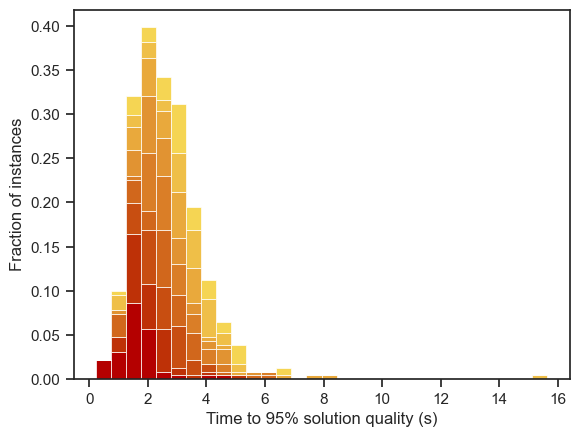

In [67]:
import matplotlib.colors as mcolors

dfs = [seq_time_of_95_df.query(f"number_of_nodes == {num_nodes}")['time_of_95'] for num_nodes in seq_time_of_95_df['number_of_nodes'].unique()]

color_list = [mcolors.rgb2hex(my_cmap(i)) for i in range(9)]
# sns.histplot(seq_time_of_95_df, x='time_of_95', hue='number_of_units', palette=my_cmap_r, legend=False, bins=40, linewidth=0.5, stat='density', multiple='stack')
plt.hist(dfs, bins=30, color=color_list, density=1, stacked=True, linewidth=0.5)
# plt.hist(dfs, bins=20, color=color_list,stacked=True)
# plt.hist(seq_time_of_95_df['time_of_95'], bins=20, color='#b40000', density=1,stacked=True)
plt.xlabel('Time to 95% solution quality (s)')
plt.ylabel('Fraction of instances')
# plt.ylim([0, 3])

plt.savefig('figs/stacked_hist_MH_nodes_seq.png', dpi=500, bbox_inches="tight")

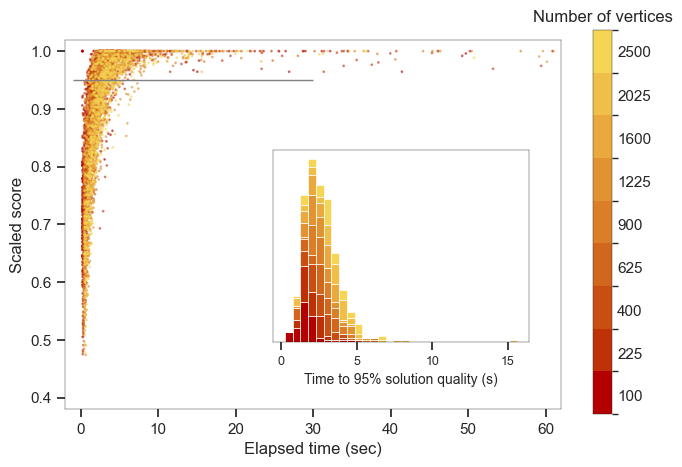

In [68]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 0.3

fig, ax = plt.subplots()
ax.hlines(0.95, xmin=-1, xmax=30, linewidth=1, color='grey')
scatter = ax.scatter(results_seqBORG['elapsed_time'], results_seqBORG['scaled score'],
                     c=results_seqBORG['number_of_nodes'], s=1, cmap=my_cmap, alpha=0.5)
# scatter = ax.scatter(results_seqBORG['nfe'], results_seqBORG['scaled score'], c=results_seqBORG['number_of_units'], s=1, cmap=my_cmap)
sns.set_style('ticks')

ax.set_ylabel('Scaled score')
ax.set_xlabel('Elapsed time (sec)')
# ax.set_xlabel('nfe')
plt.ylim([0.38,1.02])
plt.xlim([-2, 62])

# legend - cont colorbar
# clb = plt.colorbar(scatter, shrink=0.5, anchor=(-0.2,0.2))
# clb.ax.tick_params(labelsize=8)
# clb.ax.set_title('Number of units', horizontalalignment='left', verticalalignment='bottom', fontsize=10)

# legend - patches
# plt.legend([mpatches.Patch(color=my_cmap(b)) for b in range(10)],
#            [f'{num}' for num in results_seqBORG['number_of_units'].unique()], 
#            title='Number of units', 
#            loc=1, bbox_to_anchor=(1.3, 1),
#            fontsize='10')

# legend - discrete colorbar
# bounds = results_seqBORG['number_of_nodes'].unique()
bounds = [50, 162.5, 312.5, 512.5, 762.5, 1062.5, 1412.5, 1812.5, 2262.5, 2737.5]
norm = mpl.colors.BoundaryNorm(bounds, my_cmap.N)
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
# cb = plt.colorbar.ColorbarBase(ax2, cmap=my_cmap, norm=norm,
#     spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=my_cmap),
             cax=ax2, orientation='vertical',
             # label="Number of nodes", 
             ticks=results_seqBORG['number_of_nodes'].unique())
cbar.ax.set_title('Number of vertices')
cbar.ax.tick_params(size=0)

# this is an inset axes over the main axes
a = plt.axes([.45, .25, .4, .4])
n, bins, patches = plt.hist(dfs, bins=30, color=color_list, density=1, stacked=True, linewidth=0.5)
# plt.xticks([0, 100])
# sns.histplot(seq_time_of_95_df, x='time_of_95', hue='number_of_units', palette=my_cmap, legend=False, bins=40, linewidth=0.3, stat='density', multiple='stack')
plt.xticks(fontsize=9)
# plt.yticks(fontsize=9)
plt.yticks([])

plt.xlabel('Time to 95% solution quality (s)', fontsize=10)
# plt.ylabel('Fraction', fontsize=10)


plt.savefig('figs/final/MH_nodes_seq.png', dpi=500, bbox_inches="tight")
plt.show()

# Pydsol - borg

In [69]:
results_pydsolBORG = pd.read_csv('cleaned_data/pydsol_borg_MH/df_pydsol_borg_nodes_cleaned.csv')

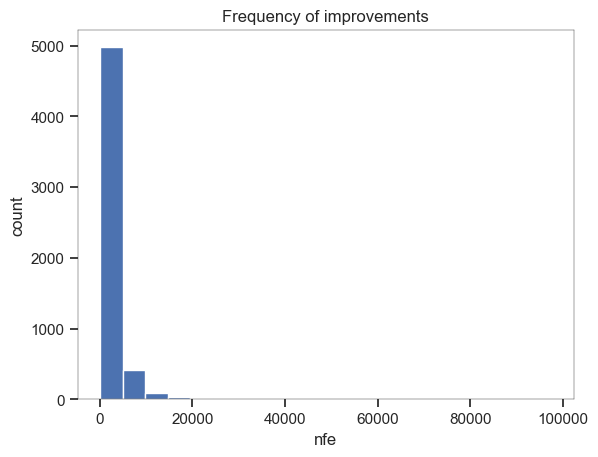

In [70]:
plt.hist(results_pydsolBORG['nfe'], bins=20)
plt.title('Frequency of improvements')
plt.xlabel('nfe')
plt.ylabel('count')
plt.show()

In [71]:
results_pydsolBORG['elapsed time (min)'] = results_pydsolBORG['elapsed_time'] / 60

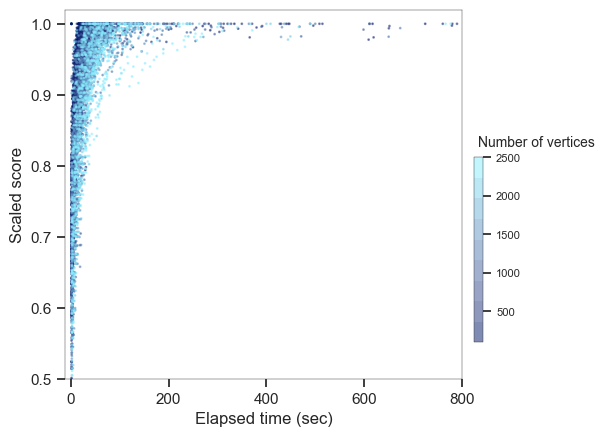

In [72]:
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap, to_rgb

cmap_name = 'my_list'
my_rgb = []
# colors = ['#b40000', '#c03607', '#cb5311', '#d56d1c', '#df8528', '#e89c33', '#f0b43e', '#f8cb4a', '#ffe356']
colors = ['#001969', '#1f307b', '#32498d', '#42629f', '#527cb2', '#6097c5', '#6eb3d8', '#7bd0eb', '#89edff']
for color in colors:
    my_rgb.append(to_rgb(color))
my_cmap = LinearSegmentedColormap.from_list(cmap_name, my_rgb, N=9)

fig, ax = plt.subplots()
scatter = ax.scatter(results_pydsolBORG['elapsed_time'], results_pydsolBORG['scaled score'],
                     c=results_pydsolBORG['number_of_nodes'], s=1, cmap=my_cmap, alpha=0.5)
# scatter = ax.scatter(results_seqBORG['nfe'], results_seqBORG['scaled score'], c=results_seqBORG['number_of_units'], s=1, cmap=my_cmap)
sns.set_style('ticks')
ax.set_ylabel('Scaled score')
ax.set_xlabel('Elapsed time (sec)')
plt.ylim([0.5, 1.02])
plt.xlim([-12, 800])

clb = plt.colorbar(scatter, shrink=0.5, anchor=(-0.2, 0.2))
clb.ax.tick_params(labelsize=8)
clb.ax.set_title('Number of vertices', horizontalalignment='left', verticalalignment='bottom', fontsize=10)

plt.show()

fig.savefig('figs/pydsol_simopt_nodes_BORG.png', dpi=300, bbox_inches="tight")

In [73]:
seq_time_of_90_df_pydsol = pd.DataFrame(columns=["number_of_nodes", "time_of_90", "nfe_of_90", "config", "seed"])
seq_time_of_95_df_pydsol = pd.DataFrame(columns=["number_of_nodes", "time_of_95", "nfe_of_95", "config", "seed"])

for num_nodes in results_pydsolBORG['number_of_nodes'].unique():
    for seed in results_pydsolBORG['seed'].unique():
        for config in results_pydsolBORG['config'].unique():
            results_subset = results_pydsolBORG.query(f"config == {config} & seed == {seed} & number_of_nodes == {num_nodes}")

            row_of_first_90 = results_subset[results_subset['scaled score'].ge(0.9)].drop_duplicates(subset='seed', keep='first')
            row_of_first_95 = results_subset[results_subset['scaled score'].ge(0.95)].drop_duplicates(subset='seed', keep='first')
            # if len(row_of_first_95) == 0: 
            #     row_of_first_95 = results_subset.drop_duplicates(subset='seed', keep='last')
            #     row_of_first_95['elapsed_time'] = -5
            #     row_of_first_95['nfe'] = -5
            #     print('95% not found')
            seq_time_of_90_df_pydsol = pd.concat([seq_time_of_90_df_pydsol, row_of_first_90], ignore_index=True)
            seq_time_of_95_df_pydsol = pd.concat([seq_time_of_95_df_pydsol, row_of_first_95], ignore_index=True)

seq_time_of_90_df_pydsol['nfe_of_90'] = seq_time_of_90_df_pydsol['nfe']
seq_time_of_90_df_pydsol['time_of_90'] = seq_time_of_90_df_pydsol['elapsed_time']
seq_time_of_95_df_pydsol['nfe_of_95'] = seq_time_of_95_df_pydsol['nfe']
seq_time_of_95_df_pydsol['time_of_95'] = seq_time_of_95_df_pydsol['elapsed_time']

seq_time_of_90_df_pydsol=seq_time_of_90_df_pydsol.drop(['elapsed_time', 'nfe', 'best_score', 'scaled score', 'improvement'], axis=1)
seq_time_of_95_df_pydsol=seq_time_of_95_df_pydsol.drop(['elapsed_time', 'nfe', 'best_score', 'scaled score', 'improvement'], axis=1)

seq_time_of_90_df_pydsol.insert(1, 'algorithm', 'simulation model optimization, metaheuristic')
seq_time_of_95_df_pydsol.insert(1, 'algorithm', 'simulation model optimization, metaheuristic')

seq_time_of_95_df_pydsol

,number_of_nodes,algorithm,time_of_95,nfe_of_95,config,seed,Unnamed: 0,pi_0,pi_1,pi_2,pi_3,pi_4,probability_SBX,probability_PCX,probability_DE,probability_UNDX,probability_SPX,probability_UM,number_of_units,elapsed time (min)
0,100,"simulation model optimization, metaheuristic",8.937019,1287.0,0,0,8.0,40.0,13.0,11.0,36.0,15.0,0.500000,0.292453,0.066038,0.047170,0.056604,0.037736,5.0,0.148950
1,100,"simulation model optimization, metaheuristic",13.921535,2028.0,1,0,13.0,21.0,12.0,17.0,3.0,19.0,0.867925,0.075472,0.009434,0.009434,0.009434,0.028302,5.0,0.232026
2,100,"simulation model optimization, metaheuristic",13.583255,2010.0,2,0,13.0,20.0,20.0,7.0,19.0,16.0,0.773585,0.113208,0.018868,0.009434,0.047170,0.037736,5.0,0.226388
3,100,"simulation model optimization, metaheuristic",12.640492,1875.0,3,0,12.0,25.0,21.0,21.0,2.0,21.0,0.594340,0.301887,0.018868,0.009434,0.018868,0.056604,5.0,0.210675
4,100,"simulation model optimization, metaheuristic",13.404263,2033.0,4,0,13.0,1.0,24.0,13.0,3.0,2.0,0.943396,0.018868,0.009434,0.009434,0.009434,0.009434,5.0,0.223404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2500,"simulation model optimization, metaheuristic",26.095616,1425.0,5,4,9.0,111.0,0.0,14.0,10.0,0.0,0.556604,0.311321,0.028302,0.056604,0.009434,0.037736,5.0,0.434927
446,2500,"simulation model optimization, metaheuristic",55.998488,2896.0,6,4,19.0,42.0,0.0,51.0,16.0,48.0,0.877358,0.009434,0.009434,0.009434,0.009434,0.084906,5.0,0.933308
447,2500,"simulation model optimization, metaheuristic",51.001932,2718.0,7,4,18.0,111.0,67.0,21.0,39.0,0.0,0.849057,0.009434,0.009434,0.009434,0.009434,0.113208,5.0,0.850032
448,2500,"simulation model optimization, metaheuristic",69.414375,3619.0,8,4,24.0,52.0,72.0,15.0,102.0,76.0,0.830189,0.056604,0.037736,0.009434,0.009434,0.056604,5.0,1.156906


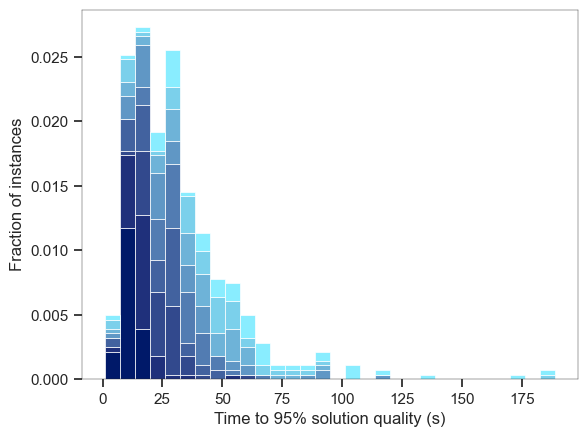

In [74]:
import matplotlib.colors as mcolors

dfs = [seq_time_of_95_df_pydsol.query(f"number_of_nodes == {num_nodes}")['time_of_95'] for num_nodes in seq_time_of_95_df_pydsol['number_of_nodes'].unique()]

color_list = [mcolors.rgb2hex(my_cmap(i)) for i in range(9)]
# sns.histplot(seq_time_of_95_df, x='time_of_95', hue='number_of_units', palette=my_cmap_r, legend=False, bins=40, linewidth=0.5, stat='density', multiple='stack')
plt.hist(dfs, bins=30, color=color_list, density=1, stacked=True, linewidth=0.5)
# plt.hist(dfs, bins=20, color=color_list,stacked=True)
# plt.hist(seq_time_of_95_df['time_of_95'], bins=20, color='#b40000', density=1,stacked=True)
plt.xlabel('Time to 95% solution quality (s)')
plt.ylabel('Fraction of instances')
# plt.ylim([0, 3])

plt.savefig('figs/stacked_hist_MH_nodes_pydsol.png', dpi=500, bbox_inches="tight")

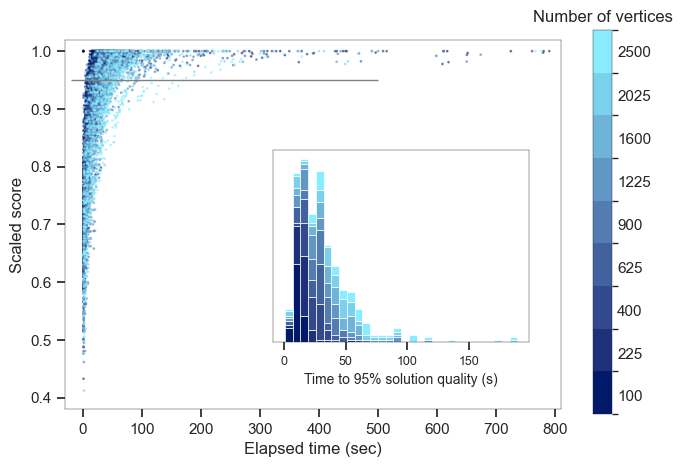

In [75]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 0.3

fig, ax = plt.subplots()
ax.hlines(0.95, xmin=-20, xmax=500, linewidth=1, color='grey')
scatter = ax.scatter(results_pydsolBORG['elapsed_time'], results_pydsolBORG['scaled score'],
                     c=results_pydsolBORG['number_of_nodes'], s=1, cmap=my_cmap, alpha=0.5)
# scatter = ax.scatter(results_seqBORG['nfe'], results_seqBORG['scaled score'], c=results_seqBORG['number_of_units'], s=1, cmap=my_cmap)
sns.set_style('ticks')

ax.set_ylabel('Scaled score')
ax.set_xlabel('Elapsed time (sec)')
# ax.set_xlabel('nfe')
plt.ylim([0.38,1.02])
plt.xlim([-30,810])

# legend - cont colorbar
# clb = plt.colorbar(scatter, shrink=0.5, anchor=(-0.2,0.2))
# clb.ax.tick_params(labelsize=8)
# clb.ax.set_title('Number of units', horizontalalignment='left', verticalalignment='bottom', fontsize=10)

# legend - patches
# plt.legend([mpatches.Patch(color=my_cmap(b)) for b in range(10)],
#            [f'{num}' for num in results_seqBORG['number_of_units'].unique()], 
#            title='Number of units', 
#            loc=1, bbox_to_anchor=(1.3, 1),
#            fontsize='10')

# legend - discrete colorbar
# bounds = results_seqBORG['number_of_nodes'].unique()
bounds = [50, 162.5, 312.5, 512.5, 762.5, 1062.5, 1412.5, 1812.5, 2262.5, 2737.5]
norm = mpl.colors.BoundaryNorm(bounds, my_cmap.N)
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
# cb = plt.colorbar.ColorbarBase(ax2, cmap=my_cmap, norm=norm,
#     spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=my_cmap),
             cax=ax2, orientation='vertical',
             # label="Number of nodes", 
             ticks=results_pydsolBORG['number_of_nodes'].unique())
cbar.ax.set_title('Number of vertices')
cbar.ax.tick_params(size=0)

# this is an inset axes over the main axes
a = plt.axes([.45, .25, .4, .4])
n, bins, patches = plt.hist(dfs, bins=30, color=color_list, density=1, stacked=True, linewidth=0.5)
# plt.xticks([0, 100])
# sns.histplot(seq_time_of_95_df, x='time_of_95', hue='number_of_units', palette=my_cmap, legend=False, bins=40, linewidth=0.3, stat='density', multiple='stack')
plt.xticks(fontsize=9)
# plt.yticks(fontsize=9)
plt.yticks([])

plt.xlabel('Time to 95% solution quality (s)', fontsize=10)
# plt.ylabel('Frequency', fontsize=10)


plt.savefig('figs/final/MH_nodes_pydsol.png', dpi=500, bbox_inches="tight")
plt.show()

# comparison

In [76]:
results_seqBORG

,Unnamed: 0,nfe,best_score,elapsed_time,pi_0,pi_1,pi_2,pi_3,pi_4,probability_SBX,...,probability_UNDX,probability_SPX,probability_UM,number_of_units,number_of_nodes,config,seed,scaled score,improvement,elapsed time (min)
0,1,245,0.548,0.386258,31.0,15.0,7.0,24.0,15.0,0.219048,...,0.104762,0.342857,0.095238,5,100,0,0,0.740541,0.014,0.006438
1,5,839,0.576,0.943138,25.0,17.0,7.0,14.0,21.0,0.295238,...,0.095238,0.228571,0.066667,5,100,0,0,0.778378,0.028,0.015719
2,6,989,0.606,1.080260,13.0,26.0,7.0,0.0,23.0,0.352381,...,0.038095,0.247619,0.028571,5,100,0,0,0.818919,0.030,0.018004
3,8,1289,0.640,1.330665,25.0,26.0,7.0,17.0,20.0,0.476190,...,0.009524,0.171429,0.019048,5,100,0,0,0.864865,0.034,0.022178
4,9,1440,0.662,1.454237,25.0,19.0,7.0,28.0,21.0,0.575472,...,0.009434,0.094340,0.009434,5,100,0,0,0.894595,0.022,0.024237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617,56,8424,0.426,9.118191,36.0,58.0,48.0,7.0,23.0,0.952830,...,0.009434,0.009434,0.009434,5,2500,9,4,0.986111,0.002,0.151970
5618,102,15266,0.428,15.646393,36.0,58.0,48.0,21.0,23.0,0.952830,...,0.009434,0.009434,0.009434,5,2500,9,4,0.990741,0.002,0.260773
5619,130,19419,0.430,19.960499,79.0,58.0,48.0,21.0,31.0,0.952830,...,0.009434,0.009434,0.009434,5,2500,9,4,0.995370,0.002,0.332675
5620,133,19866,0.432,20.353673,79.0,58.0,48.0,21.0,23.0,0.952830,...,0.009434,0.009434,0.009434,5,2500,9,4,1.000000,0.002,0.339228


In [77]:
percentiles_90_90 = {}
for num_nodes in seq_time_of_90_df['number_of_nodes'].unique():
    results_subset = seq_time_of_90_df.query(f"number_of_nodes == {num_nodes}")
    # plt.hist(results_subset['time_of_90'])
    # plt.show()
    # percentiles_90_90[num_nodes] = (np.percentile(results_subset['time_of_90'], 90), np.percentile(results_subset['nfe_of_90'], 90))
    percentiles_90_90[num_nodes] = np.percentile(results_subset['time_of_90'], 90)/60

percentiles_90_90

{100: 0.028348124821980798,
 225: 0.0302310053507487,
 400: 0.03742616097132365,
 625: 0.04175702452659607,
 900: 0.052789965470631924,
 1225: 0.04733198245366414,
 1600: 0.04945613066355388,
 2025: 0.05273107091585795,
 2500: 0.06469045917193095}

In [78]:
percentiles_90_95 = {}
for num_nodes in seq_time_of_90_df['number_of_nodes'].unique():
    results_subset = seq_time_of_90_df.query(f"number_of_nodes == {num_nodes}")
    # plt.hist(results_subset['time_of_90'])
    # plt.show()
    # percentiles_90_95[num_nodes] = (np.percentile(results_subset['time_of_90'], 95), np.percentile(results_subset['nfe_of_90'], 95))
    percentiles_90_95[num_nodes] = np.percentile(results_subset['time_of_90'], 95)/60

percentiles_90_90

{100: 0.028348124821980798,
 225: 0.0302310053507487,
 400: 0.03742616097132365,
 625: 0.04175702452659607,
 900: 0.052789965470631924,
 1225: 0.04733198245366414,
 1600: 0.04945613066355388,
 2025: 0.05273107091585795,
 2500: 0.06469045917193095}

In [79]:
percentiles_95_90 = {}
for num_nodes in seq_time_of_95_df['number_of_nodes'].unique():
    results_subset = seq_time_of_95_df.query(f"number_of_nodes == {num_nodes}")
    # plt.hist(results_subset['time_of_90'])
    # plt.show()
    # percentiles_95_90[num_nodes] = (np.percentile(results_subset['time_of_95'], 90), np.percentile(results_subset['nfe_of_95'], 90))
    percentiles_95_90[num_nodes] = np.percentile(results_subset['time_of_95'], 90)/60

percentiles_95_90

{100: 0.037836215496063225,
 225: 0.04629151821136475,
 400: 0.05551377654075622,
 625: 0.06233168323834737,
 900: 0.06878838221232098,
 1225: 0.07110177357991537,
 1600: 0.0670678242047628,
 2025: 0.07557276765505473,
 2500: 0.08358081022898357}

In [80]:
percentiles_95_95 = {}
for num_nodes in seq_time_of_95_df['number_of_nodes'].unique():
    results_subset = seq_time_of_95_df.query(f"number_of_nodes == {num_nodes}")
    # plt.hist(results_subset['time_of_90'])
    # plt.show()
    # percentiles_95_95[num_nodes] = (np.percentile(results_subset['time_of_95'], 95), np.percentile(results_subset['nfe_of_95'], 95))
    percentiles_95_95[num_nodes] = np.percentile(results_subset['time_of_95'], 95)/60

percentiles_95_95

{100: 0.04404335776964821,
 225: 0.058013489445050546,
 400: 0.05720103959242503,
 625: 0.06965188562870023,
 900: 0.07215684274832407,
 1225: 0.07620458483695984,
 1600: 0.10054523805777223,
 2025: 0.08366866310437518,
 2500: 0.08759688834349315}

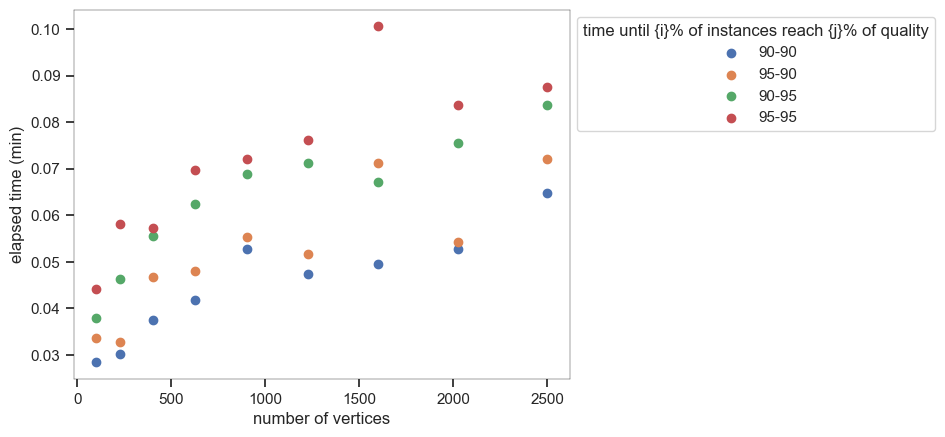

In [81]:
plt.scatter(x=percentiles_90_90.keys(), y=percentiles_90_90.values(), label='90-90')
plt.scatter(x=percentiles_90_95.keys(), y=percentiles_90_95.values(), label='95-90')
plt.scatter(x=percentiles_95_90.keys(), y=percentiles_95_90.values(), label='90-95')
plt.scatter(x=percentiles_95_95.keys(), y=percentiles_95_95.values(), label='95-95')

# plt.scatter(results_MIP['number_of_nodes'], results_MIP['elapsed time'], label='MIP')

plt.xlabel('number of vertices')
plt.ylabel('elapsed time (min)')
plt.legend(title='time until {i}% of instances reach {j}% of quality', bbox_to_anchor=(1,1))

plt.savefig('figs/percentiles.png', dpi=300, bbox_inches='tight')
# plt.show()

Text(0.5, 0, 'Number of vertices')

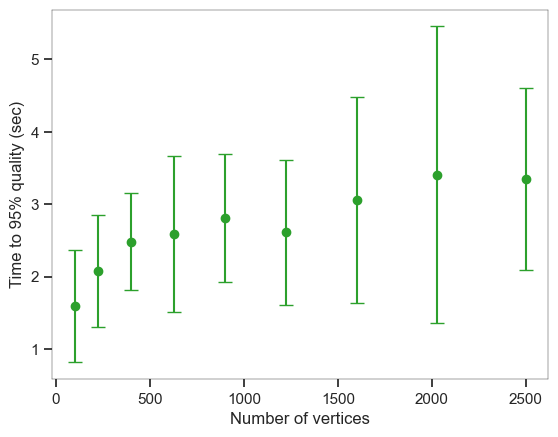

In [82]:
errorplot_x = list(seq_time_of_95_df['number_of_nodes'].unique())
errorplot_y = []
errorplot_yerr = []

for num_nodes in seq_time_of_95_df['number_of_nodes'].unique():
    results_subset = seq_time_of_95_df.query(f"number_of_nodes == {num_nodes}")
    errorplot_y.append(np.mean(results_subset['time_of_95']))
    errorplot_yerr.append(np.std(results_subset['time_of_95']))

plt.errorbar(x=errorplot_x, y=errorplot_y, yerr=errorplot_yerr, fmt='o', capsize=5, c='tab:green')
plt.ylabel('Time to 95% quality (sec)')
plt.xlabel('Number of vertices')

In [83]:
seq_time_of_95_df

,number_of_nodes,algorithm,time_of_95,nfe_of_95,config,seed,Unnamed: 0,pi_0,pi_1,pi_2,pi_3,pi_4,probability_SBX,probability_PCX,probability_DE,probability_UNDX,probability_SPX,probability_UM,number_of_units,elapsed time (min)
0,100,"sequential simulation-optimization, metaheuristic",2.211295,2329.0,0,0,15.0,24.0,19.0,7.0,17.0,23.0,0.764151,0.179245,0.028302,0.009434,0.009434,0.009434,5.0,0.036855
1,100,"sequential simulation-optimization, metaheuristic",1.633872,1710.0,1,0,11.0,22.0,14.0,9.0,3.0,22.0,0.698113,0.179245,0.028302,0.009434,0.028302,0.056604,5.0,0.027231
2,100,"sequential simulation-optimization, metaheuristic",1.514428,1588.0,2,0,10.0,27.0,20.0,7.0,27.0,16.0,0.405660,0.207547,0.075472,0.028302,0.245283,0.037736,5.0,0.025240
3,100,"sequential simulation-optimization, metaheuristic",1.958795,2158.0,3,0,14.0,25.0,15.0,20.0,2.0,23.0,0.632075,0.216981,0.028302,0.009434,0.009434,0.103774,5.0,0.032647
4,100,"sequential simulation-optimization, metaheuristic",1.337630,1278.0,4,0,8.0,18.0,6.0,11.0,3.0,1.0,0.600000,0.114286,0.161905,0.009524,0.028571,0.085714,5.0,0.022294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2500,"sequential simulation-optimization, metaheuristic",1.384009,827.0,5,4,5.0,102.0,0.0,22.0,15.0,0.0,0.500000,0.264151,0.113208,0.037736,0.009434,0.075472,5.0,0.023067
446,2500,"sequential simulation-optimization, metaheuristic",3.798531,2770.0,6,4,18.0,42.0,0.0,43.0,16.0,67.0,0.896226,0.028302,0.018868,0.009434,0.009434,0.037736,5.0,0.063309
447,2500,"sequential simulation-optimization, metaheuristic",6.549971,5877.0,7,4,39.0,111.0,67.0,4.0,39.0,1.0,0.952830,0.009434,0.009434,0.009434,0.009434,0.009434,5.0,0.109166
448,2500,"sequential simulation-optimization, metaheuristic",3.979586,3486.0,8,4,23.0,52.0,30.0,15.0,102.0,46.0,0.952830,0.009434,0.009434,0.009434,0.009434,0.009434,5.0,0.066326


# pydsol borg

Text(0.5, 0, 'Number of vertices')

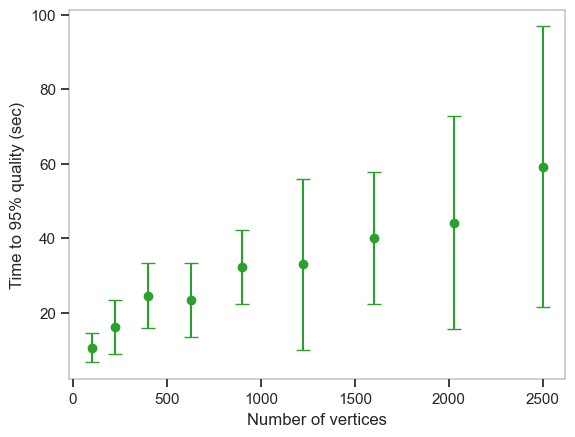

In [84]:
errorplot_x_pydsol = list(seq_time_of_95_df_pydsol['number_of_nodes'].unique())
errorplot_y_pydsol = []
errorplot_yerr_pydsol = []

for num_nodes in seq_time_of_95_df_pydsol['number_of_nodes'].unique():
    results_subset = seq_time_of_95_df_pydsol.query(f"number_of_nodes == {num_nodes}")
    errorplot_y_pydsol.append(np.mean(results_subset['time_of_95']))
    errorplot_yerr_pydsol.append(np.std(results_subset['time_of_95']))

plt.errorbar(x=errorplot_x_pydsol, y=errorplot_y_pydsol, yerr=errorplot_yerr_pydsol, fmt='o', capsize=5, c='tab:green')
plt.ylabel('Time to 95% quality (sec)')
plt.xlabel('Number of vertices')


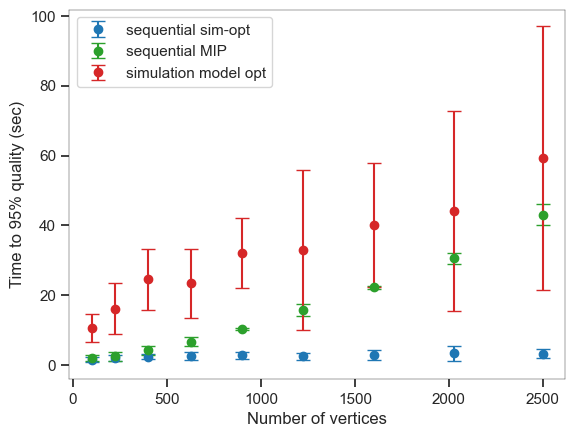

In [85]:
plt.errorbar(x=errorplot_x, y=errorplot_y, yerr=errorplot_yerr, fmt='o', capsize=5, c='tab:blue', label='sequential sim-opt')
plt.errorbar(x=errorplot_x_mip, y=errorplot_y_mip, yerr=errorplot_yerr_mip, fmt='o', capsize=5, c='tab:green', label='sequential MIP')
plt.errorbar(x=errorplot_x_pydsol, y=errorplot_y_pydsol, yerr=errorplot_yerr_pydsol, fmt='o', capsize=5, c='tab:red', label='simulation model opt')
plt.ylabel('Time to 95% quality (sec)')
plt.xlabel('Number of vertices')
plt.legend()

plt.savefig('figs/MH_nodes.png', dpi=300)
plt.show()

In [89]:
results_MIP['algorithm'] = 'sequential simulation-optimization, MIP'
results_MIP['time_of_95'] = results_MIP['elapsed time']

In [101]:
combined_results_95 = pd.concat([seq_time_of_95_df, seq_time_of_95_df_pydsol, results_MIP])

In [94]:
hue_dict = {'sequential simulation-optimization, metaheuristic': '#b40000',
            'simulation model optimization, metaheuristic':'#32498d',
            'sequential simulation-optimization, MIP': 'tab:green'
            }

   number_of_nodes                                          algorithm  \
0              100  sequential simulation-optimization, metaheuristic   
1              100  sequential simulation-optimization, metaheuristic   
2              100  sequential simulation-optimization, metaheuristic   
3              100  sequential simulation-optimization, metaheuristic   
4              100  sequential simulation-optimization, metaheuristic   
5              100  sequential simulation-optimization, metaheuristic   
6              100  sequential simulation-optimization, metaheuristic   
7              100  sequential simulation-optimization, metaheuristic   
8              100  sequential simulation-optimization, metaheuristic   
9              100  sequential simulation-optimization, metaheuristic   
10             100  sequential simulation-optimization, metaheuristic   
11             100  sequential simulation-optimization, metaheuristic   
12             100  sequential simulation-optimizat

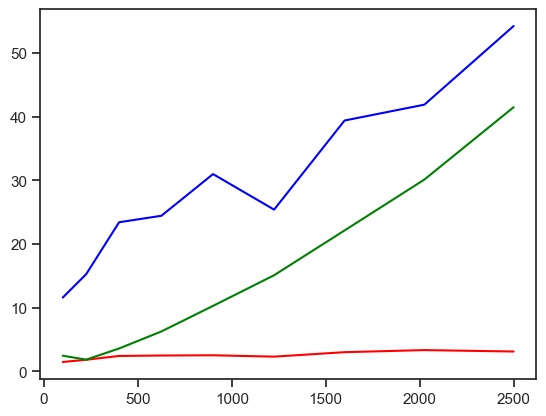

In [106]:
# calculate avg time to convergence
avgs_seq_borg = {}
avgs_seq_mip = {}
avgs_pydsol = {}

def avg_time_to_95(df, dict):
    for num_nodes in df['number_of_nodes'].unique():
        subset = df.query(f" number_of_nodes == {num_nodes}")
        print(subset)
        avg = np.median(subset['time_of_95'])
        dict[num_nodes] = avg

avg_time_to_95(seq_time_of_95_df, avgs_seq_borg)
avg_time_to_95(results_MIP, avgs_seq_mip)
avg_time_to_95(seq_time_of_95_df_pydsol, avgs_pydsol)

plt.plot(*zip(*sorted(avgs_seq_borg.items())), color='red')
plt.plot(*zip(*sorted(avgs_seq_mip.items())), color='green')
plt.plot(*zip(*sorted(avgs_pydsol.items())), color='blue')

C:\Users\isvandroffelaa\Documents\model\simopt\analysis\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\isvandroffelaa\Documents\model\simopt\analysis\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\isvandroffelaa\Documents\model\simopt\analysis\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\isvandroffelaa\Documents\model\simopt\analysis\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_c

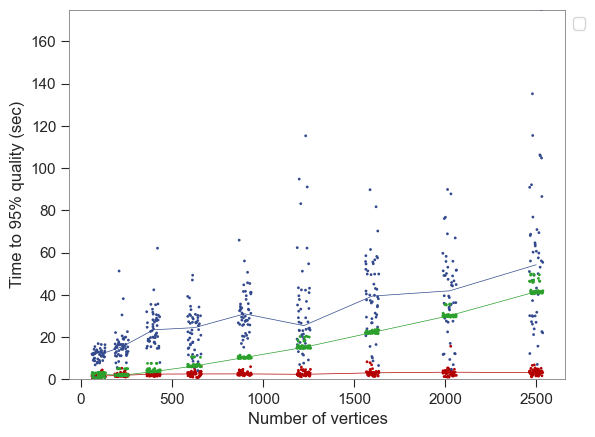

In [108]:
plt.plot(*zip(*sorted(avgs_seq_borg.items())), color='#b40000', linewidth=0.5)
plt.plot(*zip(*sorted(avgs_seq_mip.items())), color='tab:green', linewidth=0.5)
plt.plot(*zip(*sorted(avgs_pydsol.items())), color='#32498d', linewidth=0.5)

ax = sns.stripplot(data=combined_results_95, x='number_of_nodes', y='time_of_95', hue="algorithm", palette=hue_dict, size=2, native_scale=True, jitter=0.3, legend=False)
ax.set(xlabel='Number of vertices', ylabel='Time to 95% quality (sec)')
# ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 7.5], list(combined_results_95['number_of_nodes'].unique()))
# ax.get_xticks()
ax.set_ylim([0, 175])

sns.set_context("paper")
sns.set_theme(style='ticks')
for _,s in ax.spines.items():
    s.set_linewidth(0.6)
    s.set_color('grey')
ax.tick_params(width=0.8)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='upper left')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.savefig('figs/stripplot_nodes_legFalse.png', dpi=300, bbox_inches='tight')
plt.show()